### Required Try-It Activity 14.1: Generating Overfit Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [10]:
whickham_data = pd.read_csv('data/Whickham.txt')

In [11]:
whickham_data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


The columsn `outcome` and `smoker` are categorical. Let's first convert to numerical before modellibng

In [34]:
# Encode categorical variables
label_encoder = LabelEncoder()
whickham_data['outcome'] = label_encoder.fit_transform(whickham_data['outcome'])
whickham_data['smoker'] = label_encoder.fit_transform(whickham_data['smoker'])

# Splitting the dataset into training and testing sets
X = whickham_data[['smoker', 'age']]
y = whickham_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now let's track the accuracy of train and test at different values of `max_depth`

In [35]:

# Define the range of max_depth to test
max_depths = range(1, 13)  # Assuming a reasonable maximum depth for illustrative purposes
train_accuracies = []
test_accuracies = []

# Train decision tree models for each depth and record their accuracies
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate and collect accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))


Now plot to visualize the training process on test and train data

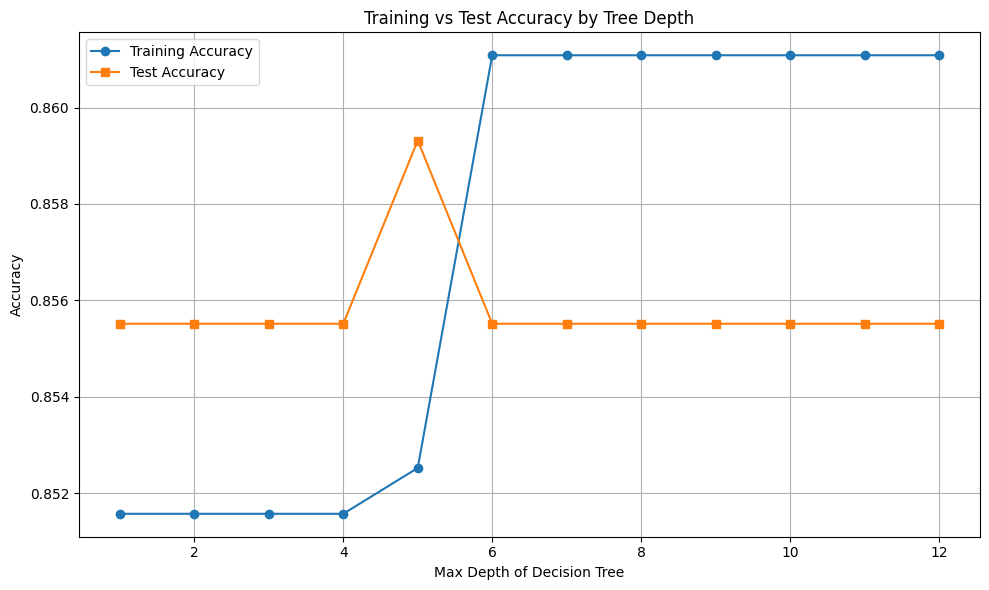

In [36]:
# Plot training and test accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy by Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best max_depth: 1
Best cross-validated accuracy: 0.8523582852001278


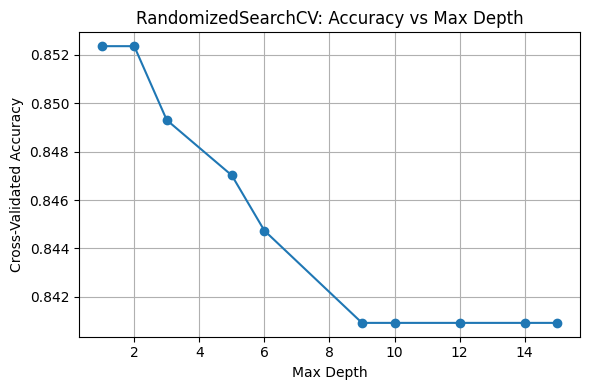

In [45]:

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'max_depth': np.arange(1, 16)  # Try depths from 1 to 30
}
dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=10,  # Try 10 random values
    scoring='accuracy',
    cv=5,
    random_state=42,
    return_train_score=True
)

random_search.fit(X, y)
print("Best max_depth:", random_search.best_params_['max_depth'])
print("Best cross-validated accuracy:", random_search.best_score_)

depths = random_search.cv_results_['param_max_depth'].data
scores = random_search.cv_results_['mean_test_score']

# Sort for cleaner plotting
sorted_pairs = sorted(zip(depths, scores))
sorted_depths, sorted_scores = zip(*sorted_pairs)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(sorted_depths, sorted_scores, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('RandomizedSearchCV: Accuracy vs Max Depth')
plt.grid(True)
plt.tight_layout()
plt.show()

Best max_depth: 1
Best cross-validated accuracy: 0.8523582852001278


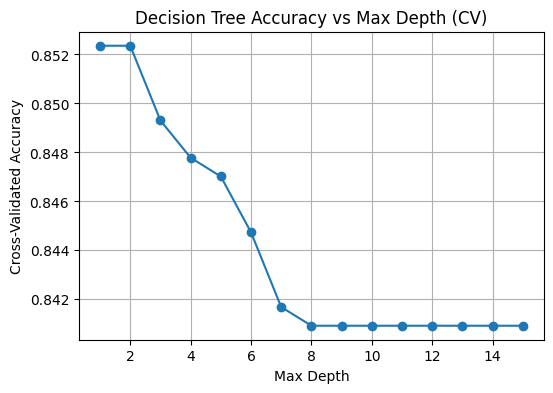

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 16)}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           return_train_score=True)

grid_search.fit(X, y)

# Best depth and corresponding score
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best cross-validated accuracy:", grid_search.best_score_)

mean_test_scores = grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(6, 4))  
plt.plot(param_grid['max_depth'], mean_test_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth (CV)')
plt.grid(True)
plt.show()

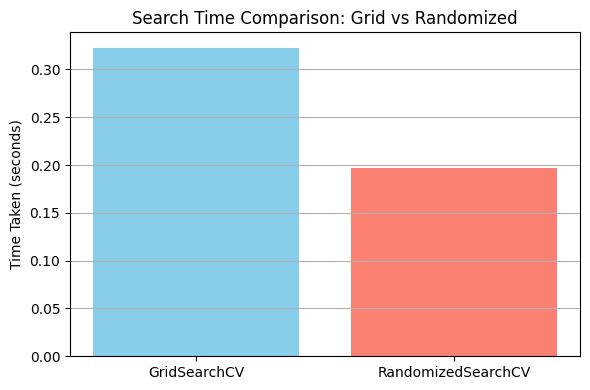

In [46]:
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid and distribution
param_grid = {'max_depth': range(1, 16)}
param_dist = {'max_depth': np.arange(1, 16)}

# ---- GridSearchCV Timing ----
start_time_grid = time.time()
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time_grid

# ---- RandomizedSearchCV Timing ----
start_time_random = time.time()
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10,
                                   scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time_random

# ---- Plot the comparison ----
methods = ['GridSearchCV', 'RandomizedSearchCV']
times = [grid_time, random_time]

plt.figure(figsize=(6, 4))
plt.bar(methods, times, color=['skyblue', 'salmon'])
plt.ylabel('Time Taken (seconds)')
plt.title('Search Time Comparison: Grid vs Randomized')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

As you can see, the training data improve as we increase `max_depth`, however, test set decreases its accuracy after 5. So at 5 is the optimal `max_depth` where both test set and training set increasing.

Now let's cross validate at different splits to see if the model stable and which depth it start to overfit at different fold.

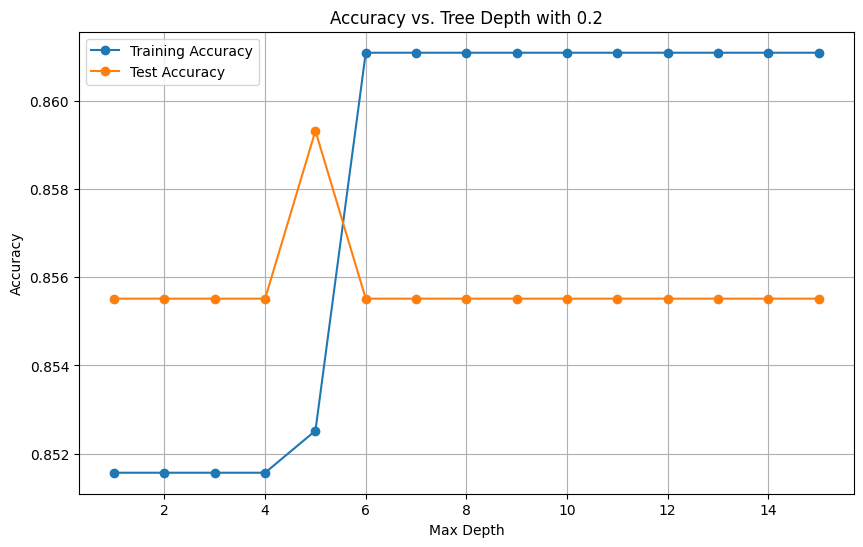

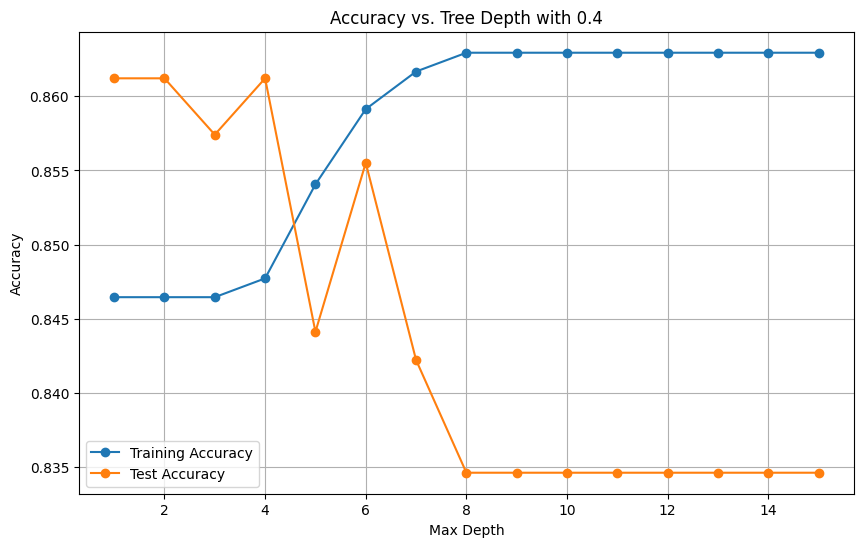

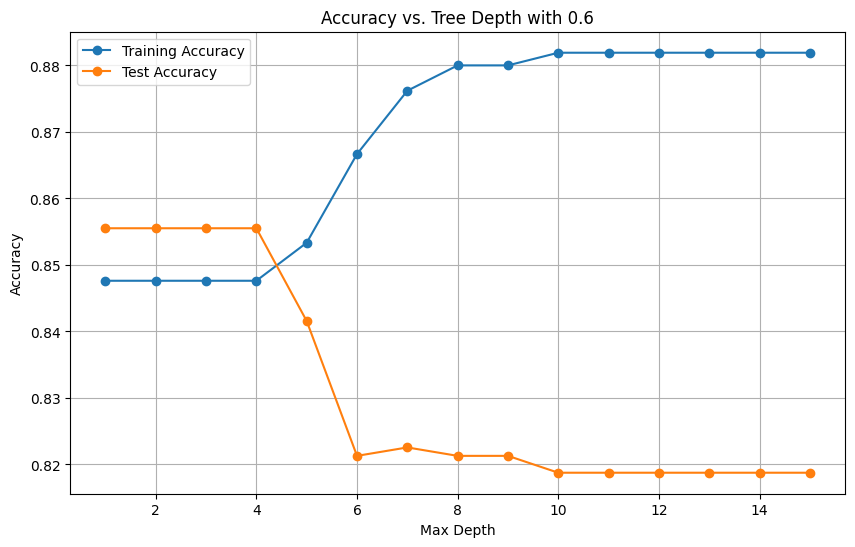

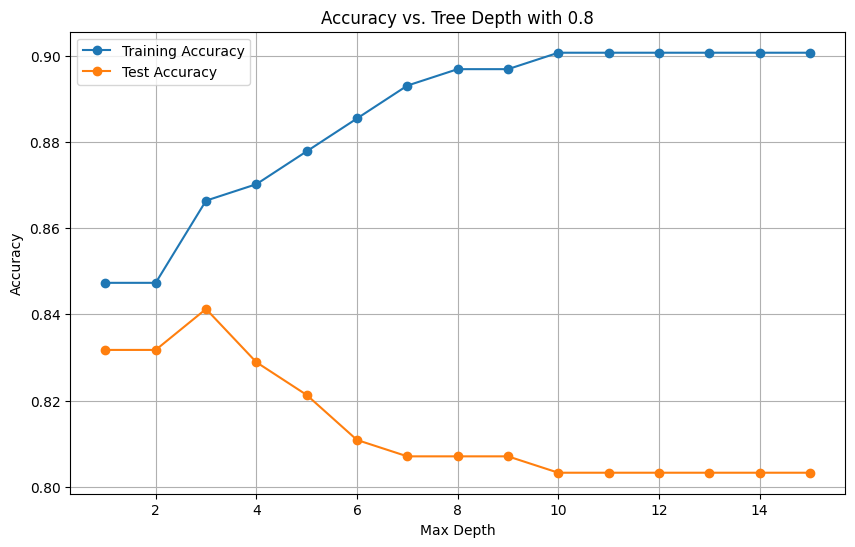

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define different test sizes to evaluate
test_sizes = [0.2, 0.4, 0.6, 0.8]

# Define the range of max_depth to test
max_depths = range(1, 16)

# Dictionary to store accuracies for different test sizes
results = {}

for test_size in test_sizes:
    # Split the data according to the current test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Lists to store accuracies for the current split
    train_accuracies = []
    test_accuracies = []

    # Train decision tree models for each depth and record their accuracies
    for depth in max_depths:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate and collect accuracies
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store accuracies in the dictionary
    results[test_size] = {'train': train_accuracies, 'test': test_accuracies}

    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Tree Depth with {test_size}')
    plt.legend()
    plt.grid(True)
    plt.show()

